<a href="https://colab.research.google.com/github/chechae/24w_audio/blob/main/E2E_TensorflowTTS_KSS_Enchiridion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorflowTTS real time E2E-TTS demonstration

This notebook provides a demonstration of the realtime E2E-TTS using TensorflowTTS for Korea (Using KSS dataset)

- Github: https://github.com/TensorSpeech/TensorflowTTS
- Colab for Eng: https://colab.research.google.com/drive/1akxtrLZHKuMiQup00tzO2olCaN-y3KiD?usp=sharing

In [ ]:
!pip install h5py==2.10
!pip install git+https://github.com/repodiac/german_transliterate
"""
HDF5(계층적데이터형식, 빅데이터 처리를 위한 파일 형식)을 python에서 사용하기 위한 모듈
독일어 자역 모듈
약어, 숫자, 타임 스탬프 등을 포함한 독일어 텍스트를 정리하고 음역 (예 : 정규화)하는 Python 모듈
"""

  Cloning https://github.com/repodiac/german_transliterate to /tmp/pip-req-build-8qhhr2hy
  Running command git clone -q https://github.com/repodiac/german_transliterate /tmp/pip-req-build-8qhhr2hy


'\nHDF5(계층적데이터형식, 빅데이터 처리를 위한 파일 형식)을 python에서 사용하기 위한 모듈\n독일어 자역 모듈\n약어, 숫자, 타임 스탬프 등을 포함한 독일어 텍스트를 정리하고 음역 (예 : 정규화)하는 Python 모듈\n'

In [ ]:
# 드라이브 마운트 - 내 드라이브와 연동
# 구글 드라이브에 연동해서 사용시 주석을 해제합니다.
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive'

## Install

In [ ]:
"""
git clone 후 git root 폴더가 아닌 상위 폴더에서 코드 실행 진행
"""
import os
!git clone https://github.com/TensorSpeech/TensorFlowTTS.git
os.chdir("TensorFlowTTS")
!pip install .
os.chdir("..")
import sys
sys.path.append("TensorFlowTTS/")

fatal: destination path 'TensorFlowTTS' already exists and is not an empty directory.
Processing /content/TensorFlowTTS
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for TensorFlowTTS: filename=TensorFlowTTS-0.0-py3-none-any.whl size=126101 sha256=f1cb80166035cdb7923963a2268e9a6ac0683c4310976f78cdb01852abe24ce5
  Stored in directory: /tmp/pip-ephem-wheel-cache-yb1ocxpm/wheels/e5/36/fb/a502156a232342e4818fe60e0d477ab8bb2b7d890030fdf93c
Successfully built TensorFlowTTS
  Attempting uninstall: TensorFlowTTS
    Found existing installation: TensorFlowTTS 0.0
    Uninstalling TensorFlowTTS-0.0:
      Successfully uninstalled Tensor

## Download pretrained feature generation model


### (a) Tacotron-2

In [ ]:
"""
10만 step 학습된 tacotron2 model을 download한다
"""
print("Downloading Tacotron2 model...")
!gdown --id {"1c8xG8cysHslJRlgB5CYbUnWngEydIfI7"} -O tacotron2-100k.h5

Downloading...
From: https://drive.google.com/uc?id=1c8xG8cysHslJRlgB5CYbUnWngEydIfI7
To: /content/tacotron2-100k.h5
128MB [00:00, 131MB/s]


### (b) FastSpeech2

In [ ]:
"""
20만 step 학습된 fastspeech2 model을 download
"""
print("Downloading FastSpeech2 model...")
!gdown --id {"1adb_hA9q0Qg959bl70WiRpm5a9Hdc2Ym"} -O fastspeech2-200k.h5

Downloading...
From: https://drive.google.com/uc?id=1adb_hA9q0Qg959bl70WiRpm5a9Hdc2Ym
To: /content/fastspeech2-200k.h5
125MB [00:00, 134MB/s]


## Download pretrained Vocoder model


### (a) Multi-band MelGAN

In [ ]:
"""
100만 step 학습한 melgan model download
"""
print("Downloading Multi-band MelGAN model...")
!gdown --id {"1tmmUjKIFekzlQi0-BmEcrib_QP2QbChY"} -O mb.melgan-1000k.h5

Downloading...
From: https://drive.google.com/uc?id=1tmmUjKIFekzlQi0-BmEcrib_QP2QbChY
To: /content/mb.melgan-1000k.h5
10.2MB [00:00, 89.8MB/s]


## Load Model

In [ ]:
"""
독일어 자역 모듈 설치 안했을 경우 오류 메시지
from tensorflow_tts.inference import AutoConfig
ModuleNotFoundError: No module named 'german_transliterate'
"""
"""

"""
import tensorflow as tf

import yaml
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoProcessor

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


### (a) Tacotron 2

In [ ]:
# text -> mel-spectrogram으로 바꿔주는 model로 tacotron2 / fastspeech2 중 하나를 선택합니다.
"""
h5py 버전 내려서 설치 안했을 시 오류
model.load_weights(pretrained_path)
AttributeError: 'str' object has no attribute 'decode'
"""
tacotron2_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/tacotron2/conf/tacotron2.kss.v1.yaml')
tacotron2 = TFAutoModel.from_pretrained(
    config=tacotron2_config,
    pretrained_path="tacotron2-100k.h5",
    name="tacotron2"
)

### (b) FastSpeech2

In [ ]:
fastspeech2_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/fastspeech2/conf/fastspeech2.kss.v1.yaml')
fastspeech2 = TFAutoModel.from_pretrained(
    config=fastspeech2_config,
    pretrained_path="fastspeech2-200k.h5",
    name="fastspeech2"
)

### (c) Multi-band MelGAN

In [ ]:
# Vocoder model (mel spectrogram -> audio)
# 멜로디 생성 모델을 사용합니다.
mb_melgan_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/multiband_melgan/conf/multiband_melgan.v1.yaml')
mb_melgan = TFAutoModel.from_pretrained(
    config=mb_melgan_config,
    pretrained_path="mb.melgan-1000k.h5",
    name="mb_melgan"
)

## Inference
- The first time model run inference will very slow cause by @tf.function.

In [ ]:
# kss dataset으로 학습시 각 자,모,특수문자 - 숫자 매핑 dictionary를 가져옵니다.
# 해당 json 파일 또한 학습의 결과입니다.
print("Downloading kss_mapper.json...")
!gdown --id {"1MO1IYKZYUCg3Ve3Gs8iF2pFGCNSFE-da"} -O kss_mapper.json

Downloading...
From: https://drive.google.com/uc?id=1MO1IYKZYUCg3Ve3Gs8iF2pFGCNSFE-da
To: /content/kss_mapper.json
100% 2.37k/2.37k [00:00<00:00, 4.05MB/s]


In [ ]:
 # input text를 inference시 숫자로 이뤄진 sequence로 변환할 때 필요합니다.
processor = AutoProcessor.from_pretrained(pretrained_path="./kss_mapper.json")

In [ ]:
# 직접 음성합성을 진행하는 함수입니다.
# text -> mel spectrogram model, vocoder model을 인자로 선택합니다.
def do_synthesis(input_text, text2mel_model, vocoder_model, text2mel_name, vocoder_name):
  input_ids = processor.text_to_sequence(input_text)

  # text2mel part
  if text2mel_name == "TACOTRON":
    _, mel_outputs, stop_token_prediction, alignment_history = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        tf.convert_to_tensor([len(input_ids)], tf.int32),
        tf.convert_to_tensor([0], dtype=tf.int32)
    )
  elif text2mel_name == "FASTSPEECH2":
    mel_before, mel_outputs, duration_outputs, _, _ = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.2], dtype=tf.float32),
        f0_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        energy_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  else:
    raise ValueError("Only TACOTRON, FASTSPEECH2 are supported on text2mel_name")

  # vocoder part
  if vocoder_name == "MB-MELGAN":
    audio = vocoder_model.inference(mel_outputs)[0, :, 0]
  else:
    raise ValueError("Only MB_MELGAN are supported on vocoder_name")

  # tacotron2면 attention graph도 함께 반환합니다.
  if text2mel_name == "TACOTRON":
    return mel_outputs.numpy(), alignment_history.numpy(), audio.numpy()
  else:
    return mel_outputs.numpy(), audio.numpy()
# attention을 시각화해서 보여주는 함수입니다.
# tacotron2의 encoder와 decoder가 어떠한 mapping을 형성하는지 보여줍니다.
def visualize_attention(alignment_history):
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.set_title(f'Alignment steps')
  im = ax.imshow(
      alignment_history,
      aspect='auto',
      origin='lower',
      interpolation='none')
  fig.colorbar(im, ax=ax)
  xlabel = 'Encoder timestep'
  plt.xlabel(xlabel)
  plt.ylabel('Decoder timestep')
  plt.tight_layout()
  plt.show()
  plt.close()

def visualize_mel_spectrogram(mels):
  mels = tf.reshape(mels, [-1, 80]).numpy()
  fig = plt.figure(figsize=(10, 8))
  ax1 = fig.add_subplot(311)
  ax1.set_title(f'Predicted Mel-after-Spectrogram')
  im = ax1.imshow(np.rot90(mels), aspect='auto', interpolation='none')
  fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
  plt.show()
  plt.close()

In [ ]:
# 입력 문장이 들어가는 곳입니다. 약간의 처리가 수행될 수 있습니다.
input_text = "저는 고객님의 요청을 도와주는 챗봇입니다. 어떤 샌드위치 메뉴를 주문하고 싶으세요? BLT, 미트볼, 햄, 참치, 터키, 베지가 있습니다."

input_text = "빵의 사이즈에는 15와 30이 있습니다. 어떤 것을 선택하시겠습니까?"
input_text = "어떤 소스를 추가하고 싶으세요? 랜치, 마요네즈, 스위트 어니언, 스위트 칠리, 스모크 바비큐가 있습니다."
# 항목간 space 1 -> 3개 (훨씬 더 나음)
input_text = "주문하신 내용은 다음과 같습니다. 메뉴 : 햄 빵 종류 : 하티 빵 사이즈 : 15 채소 : 토마토 소스 : 마요네즈 음료 : 사이다입니다. 총 결제 금액은 7500원입니다."
input_text = "주문하신 내용은 다음과 같습니다. 메뉴 : 햄   빵 종류 : 하티   빵 사이즈 : 15   채소 : 토마토   소스 : 마요네즈   음료 : 사이다입니다. 총 결제 금액은 7500원입니다."
# colon은 다음 단어의 발음을 부정확하게 만들기에 공백치환하였습니다.
# input_text = input_text.replace(':',' ')
input_text = "신은 우리의 수학 문제에는 관심이 없다. 신은 다만 경험적으로 통합할 뿐이다."
input_text = "메뉴는 쉬림프 선택할게요"
input_text = "화나시나요? 왜 그러시는거죠? 왜요? 저는 화 안날 것 같은데. 왜? 왜? "
input_text = "안녕하세요. 아담한 토니입니다."

In [ ]:
# inference 시 attention graph의 alignment value(색깔, 음량의 세기)의 범위를 지정해준다
# setup window for tacotron2 if you want to try
tacotron2.setup_window(win_front=10, win_back=10)

### (a) Tacotron2 + MB-MELGAN

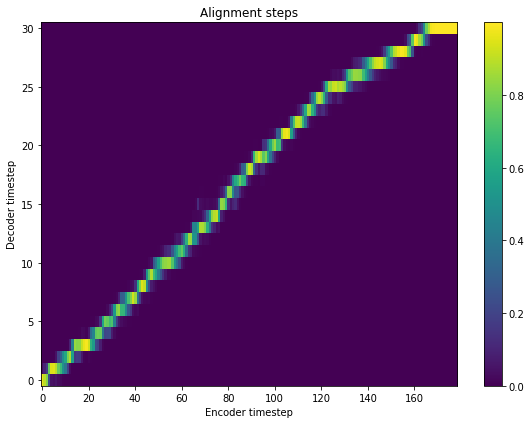

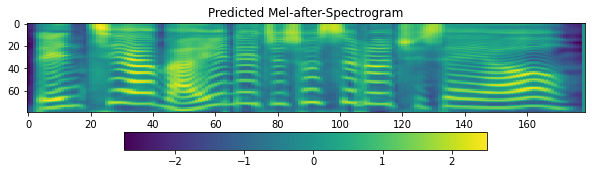

time : 1.308152437210083


In [ ]:
# 시간은 대략 1 ~ 3초 내외로 나온다.
import time
start = time.time()  # 시작 시간 저장
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, mb_melgan, "TACOTRON", "MB-MELGAN")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
ipd.Audio(audios, rate=22050)

### (b) FastSpeech2 + MB-MELGAN

In [ ]:
def visualize_mel(alignment_history)
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.set_title(f'Alignment steps')
  im = ax.imshow(
      alignment_history,
      aspect='auto',
      origin='lower',
      interpolation='none')
  fig.colorbar(im, ax=ax)
  xlabel = 'Decoder timestep'
  plt.xlabel(xlabel)
  plt.ylabel('Encoder timestep')
  plt.tight_layout()
  plt.show()
  plt.close()

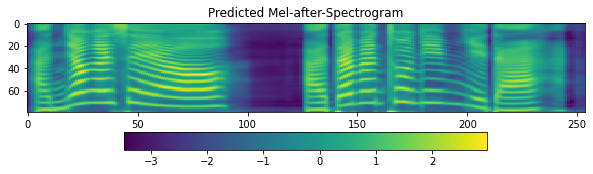

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)